In [1]:
#scaling and training linear SVM
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import matplotlib as mpl
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [2]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [3]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

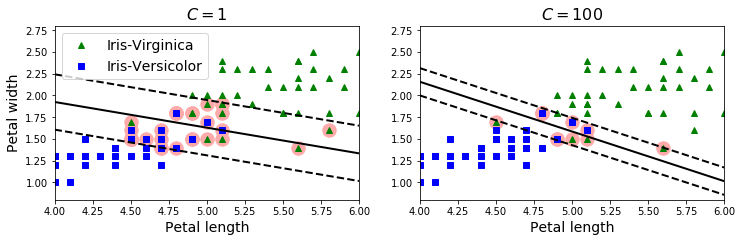

In [4]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

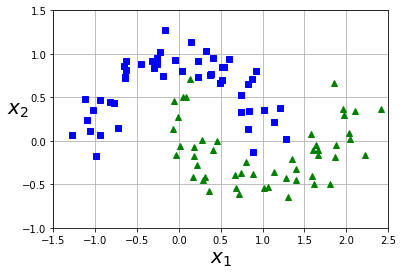

In [6]:
#non-linear SVMs
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [34]:
#polynomial transformation on the features and training a linear SVM on it
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ))

polynomial_svm_clf.fit(X, y)

C:\Users\brian\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

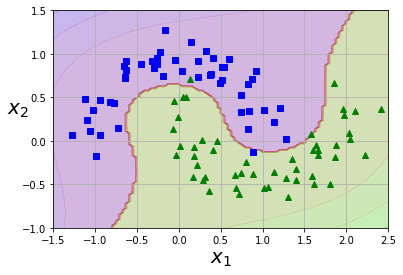

In [78]:
#plotting decision boundary and the original data set.
#Without PolynomialFeatures degree set to 3, decision boundary would be linear
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [128]:
#rough work to understand matplotlib's contour plots
a = [-1.5, 2.5, -1, 1.5]
x0s = np.linspace(a[0], a[1], 100)
x1s = np.linspace(a[2], a[3], 100)

In [129]:
x0s.shape

(100,)

In [130]:
x0, x1 =np.meshgrid(x0s, x1s)

In [131]:
x0.shape, x1.shape

((100, 100), (100, 100))

In [132]:
B = np.c_[x0.ravel(), x1.ravel()]

In [133]:
y_pred = polynomial_svm_clf.predict(B).reshape(x0.shape)
y_decision = polynomial_svm_clf.decision_function(B).reshape(x0.shape)

In [134]:
y_pred.shape, y_decision.shape

((100, 100), (100, 100))

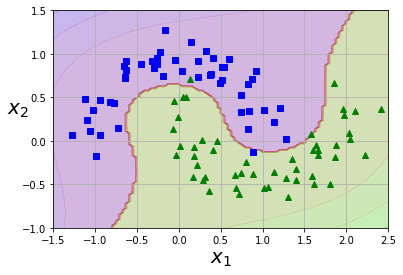

In [135]:
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [140]:
#Polynomial kernel trick to speed up computation on data sets with high amount of features 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) #coef0 controls how much model is influenced by poly degree
    ))

poly_kernel_svm_clf.fit(X, y)

X_scaled = scaler.fit_transform(X.astype(np.float64))
cross_val_score(poly_kernel_svm_clf, X_scaled, y, cv=3, scoring="accuracy")

array([0.94117647, 0.94117647, 1.        ])

In [141]:
#Gaussian RBF Kernels (Similarity features for non-linear problems)
rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)) #reduce gamma if overfitting and increase if underfitting
    ))

rbf_kernel_svm_clf.fit(X, y)
cross_val_score(rbf_kernel_svm_clf, X_scaled, y, cv=3, scoring="accuracy")

array([0.97058824, 0.94117647, 0.96875   ])

In [155]:
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [166]:
#Regression SVMs with RMSE metrics
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

#epsilon controls SVM margin width
svm_reg_mod1 = LinearSVR(epsilon=1.5)
svm_reg_mod1.fit(X, y)
predictions_mod1 = svm_reg_mod1.predict(X)

svm_reg_mod2 = LinearSVR(epsilon=0.5)
svm_reg_mod2.fit(X, y)
predictions_mod2 = svm_reg_mod2.predict(X)

lin_mse_mod1 = mean_squared_error(y, predictions_mod1)
lin_mse_mod2 = mean_squared_error(y, predictions_mod2)

#second model has slightly lower RMSE
print(np.sqrt(lin_mse_mod1), np.sqrt(lin_mse_mod2))

1.1428929914562294 1.1339701841692615


In [182]:
#Polynomial Regression SVM using kernel trick
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg_mod1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg_mod1.fit(X, y)
predictions_mod1 = svm_poly_reg_mod1.predict(X)

svm_poly_reg_mod2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg_mod2.fit(X, y)
predictions_mod2 = svm_poly_reg_mod2.predict(X)

polyreg_mse_mod1 = mean_squared_error(y, predictions_mod1)
polyreg_mse_mod2 = mean_squared_error(y, predictions_mod2)

#first model is better
print(np.sqrt(polyreg_mse_mod1), np.sqrt(polyreg_mse_mod2))

0.08944350634405543 0.12718455945495688


C:\Users\brian\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\brian\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


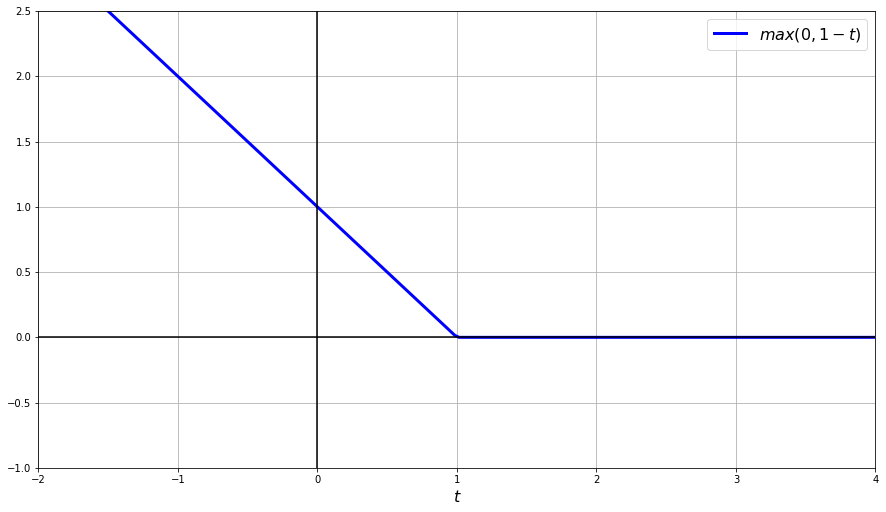

In [210]:
#hinge loss function
t = np.linspace(-2, 4, 200)
h =  np.where(1 - t < 0, 0, 1 - t) 

plt.figure(figsize=(15,8.4))
plt.plot(t, h, "b-", linewidth=3, label = "$max(0, 1-t)$")
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc="upper right", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.xlabel("$t$", fontsize=16)
plt.show()